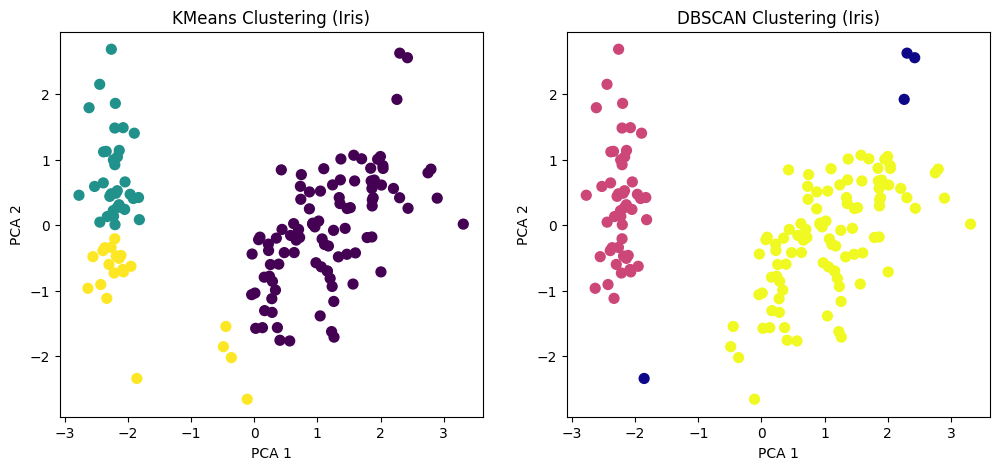

Cluster labels KMeans: [0 1 2]
Silhouette Score KMeans: 0.4798814508199817

Cluster labels DBSCAN: [-1  0  1]
Silhouette Score DBSCAN: 0.5216965052515835


In [1]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load dataset Iris
iris = datasets.load_iris()
X = iris.data

# Standarisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ====== KMEANS CLUSTERING ======
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

# Hitung Silhouette Score untuk KMeans
silhouette_kmeans = silhouette_score(X_scaled, labels_kmeans)

# ====== DBSCAN CLUSTERING ======
dbscan = DBSCAN(eps=0.8, min_samples=5)  # eps & min_samples bisa diubah-ubah
labels_dbscan = dbscan.fit_predict(X_scaled)

# Jika DBSCAN menghasilkan lebih dari 1 cluster
if len(set(labels_dbscan)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, labels_dbscan)
else:
    silhouette_dbscan = "Tidak dapat dihitung (hanya 1 cluster)"

# Reduksi dimensi ke 2D dengan PCA untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot KMeans
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_kmeans, cmap='viridis', s=50)
plt.title("KMeans Clustering (Iris)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

# Plot DBSCAN
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels_dbscan, cmap='plasma', s=50)
plt.title("DBSCAN Clustering (Iris)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.show()

# Print hasil cluster unik & Silhouette Score
print("Cluster labels KMeans:", np.unique(labels_kmeans))
print("Silhouette Score KMeans:", silhouette_kmeans)

print("\nCluster labels DBSCAN:", np.unique(labels_dbscan))
print("Silhouette Score DBSCAN:", silhouette_dbscan)
